# Neural Network From Scratch

In this notebook, we will have a look at bulding a neural network from scratch (to be more specific, using numpy library). Here, we will have a look at a fixed architecture and see how the neural network backpropagation actually works. For better understanding, the following architecture will be used in this notebook.
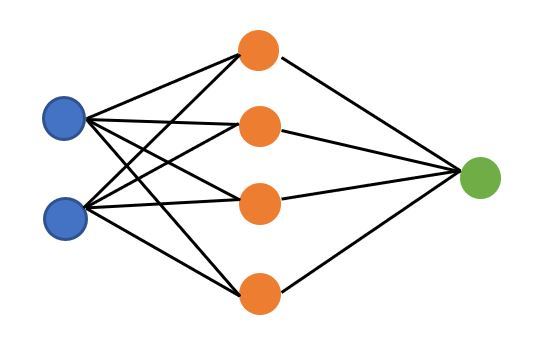

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

## Dataset Import 

We will be using the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads), which is one of the famous and simplest classification dataset. Click on the link to explore about the dataset.

In [ ]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
X = df.iloc[:,2:4].values
y = df.iloc[:,4].values

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Neural Network Code

From here, we will start coding our neural network using numpy. At first we will define the sigmoid activation function, which is as follows. 
![Sigmoid](https://miro.medium.com/max/3268/1*a04iKNbchayCAJ7-0QlesA.png)

In [ ]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

Now, we will define **bpn(epochs, learning_rate, X_train, y_train)** with initial weights set to some random numbers for each layers. Then the forward propagation is done. For the forward propagation, the following equations are performed. 

1. 	The Weighted sum of inputs and weights added with bias is calculated.
>   A = ∑ (X*W)+b

2.  The weighted sum is then sigmoided i.e. an activation is applied to it. 
>   B = σ(A)

3.  The cost function is calculated using the actual with the predicted one.
>   L =  0.5 (y-B)^2

3.  Now, the back propagation is started with the cost function. The target is to update the wights and the biases. For that the derivatives of the loss with respect to the biases are calculated. 
>   ∂L/∂W=  ∂L/∂B * ∂B/∂A * ∂A/∂W

4.  Now, the weights are updates with the derivatives and the learning rates using this formula-
> W=W+( α*  ∂L/∂W)

*Where α  is the learning rate.*

In this way, the **epoch times** iteration is done and finally the adjusted sets of weights and biases are returned by the function.


In [ ]:
def bpn(epochs, learning_rate, X_train, y_train):
    
    V = np.random.randn(X_train.shape[1], 4)  #4 is the number of neuron in hidden layer
    W = np.random.randn(4, 1)  #w is another set of weight,  4 is hidden layer, 1 is output layer
    Loss = []
    
    for i in range(epochs):
        
        for j in range(X_train.shape[0]):
            
            x = np.array(X_train[j], ndmin=2)
            A = np.dot(x, V)
            B = sigmoid(A)
            C = np.dot(B, W)
            P = sigmoid(C)
            y = np.array(y_train[j], ndmin=2)    # claculation of the cost/loss function
            L = 0.5 * (y - P) ** 2
            
            dLdP = -(y - P)
            dPdC = sigmoid(C) * (1-sigmoid(C))
            dCdW = B.T 
            dLdW = np.dot(dCdW, dLdP * dPdC)    #dL/dW
            dCdB = W.T
            dBdA = sigmoid(A) * (1-sigmoid(A))
            dAdV = x.T
            dLdV = np.dot(dAdV, np.dot(dLdP * dPdC, dCdB) * dBdA)    #dL/dV
            
            W = W - (learning_rate * dLdW)        # updating weights 
            V = V - (learning_rate * dLdV)
        print('Epoch:',i+1,' -----> Loss:',L.item(0))
        Loss.append(L.item(0))
    
    print("---------Execution Finished Successfully---------")
    return V, W, Loss

**Predict Function**

Now, we fed the returned weights d to the **predict(weights, ,X_test, threshold)** function which repeats the steps 1, 2 and 3 to get the predicted outcome.

In [ ]:
def pred(V,W,X_test,threshold = 0.5):
    y_pred = []
    test_loss = []
    for j in range(X_test.shape[0]): 
            x = np.array(X_train[j], ndmin=2)
            A = np.dot(x, V)
            B = sigmoid(A)
            C = np.dot(B, W)
            P = sigmoid(C)
            
            y = np.array(y_train[j], ndmin=2)    # calculation of the cost/loss function
            L = 0.5 * (y - P) ** 2
            test_loss.append(L.item(0))
            
            if P.item(0) >= threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
                
                
    return np.array(y_pred), test_loss

## Training The Model

To store the trained weights and biases, we are using two variables final_W and final V. Along with that, for each epoch, the loss is counted and stored in Loss array. 

In [ ]:
final_V, final_W, Loss = bpn(2000, 0.01, X_train, y_train)

## Predicting the Output

In [ ]:
y_pred, t_loss = pred(final_V, final_W, X_test)

In [ ]:
print(y_pred)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
print('Accuracy = ',accuracy,'%')

## Conclustion

This was the 2 layered neural network from scratch with back propagation. Though it could be more convenient to use classes and methods to build the model, I have prefered to go for the function based approach. It seemed easy to me. I hope you have enjoyed this notebook. If so, then I will be pleased. 